In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
from torchvision import transforms
import time
from torch.utils.data import TensorDataset, DataLoader

In [2]:
# 绘图函数
import matplotlib.pyplot as plt
def draw_loss(train_loss, test_loss):
    x = np.linspace(0, len(train_loss), len(train_loss))
    plt.plot(x, train_loss, label="Train Loss", linewidth=1.5)
    plt.plot(x, test_loss, label="Test Loss", linewidth=1.5)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [3]:
# 评价函数
def evaluate_accuracy(data_iter, model, loss_func):
    acc_sum, test_l_sum, n, c = 0.0, 0.0, 0, 0
    for X, y in data_iter:
        result = model.forward(X)
        acc_sum += (result.argmax(dim=1) == y).float().sum().item()
        test_l_sum += loss_func(result, y).item()
        n += y.shape[0]
        c += 1
    return acc_sum / n, test_l_sum / c

In [4]:
# 定义模型
# ReLU激活
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        # 模型参数
        num_inputs, num_outputs, num_hiddens = indim, outdim, hiddendim
        # 模型结构
        self.input_layer = lambda x: x.view(x.shape[0], -1)
        self.hidden_layer = nn.Sequential(
            nn.Linear(num_inputs, num_hiddens),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(num_hiddens, num_outputs)
        # 初始化参数
        for h_param in self.hidden_layer.parameters():
            torch.nn.init.normal_(h_param, mean=0, std=0.01)
        for o_param in self.output_layer.parameters():
            torch.nn.init.normal_(o_param, mean=0, std=0.01)
    def forward(self, x) :
        # 前向传播过
        flatten_input = self.input_layer(x)
        hidden_output = self.hidden_layer(flatten_input)
        final_output = self.output_layer(hidden_output)
        return final_output

In [5]:
# Sigmoid激活
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        # 模型参数
        num_inputs, num_outputs, num_hiddens = indim, outdim, hiddendim
        # 模型结构
        self.input_layer = lambda x: x.view(x.shape[0], -1)
        self.hidden_layer = nn.Sequential(
            nn.Linear(num_inputs, num_hiddens),
            nn.Sigmoid()
        )
        self.output_layer = nn.Linear(num_hiddens, num_outputs)
        # 初始化参数
        for h_param in self.hidden_layer.parameters():
            torch.nn.init.normal_(h_param, mean=0, std=0.01)
        for o_param in self.output_layer.parameters():
            torch.nn.init.normal_(o_param, mean=0, std=0.01)
    def forward(self, x) :
        # 前向传播过
        flatten_input = self.input_layer(x)
        hidden_output = self.hidden_layer(flatten_input)
        final_output = self.output_layer(hidden_output)
        return final_output

In [6]:
# ELU激活
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        # 模型参数
        num_inputs, num_outputs, num_hiddens = indim, outdim, hiddendim
        # 模型结构
        self.input_layer = lambda x: x.view(x.shape[0], -1)
        self.hidden_layer = nn.Sequential(
            nn.Linear(num_inputs, num_hiddens),
            nn.ELU()
        )
        self.output_layer = nn.Linear(num_hiddens, num_outputs)
        # 初始化参数
        for h_param in self.hidden_layer.parameters():
            torch.nn.init.normal_(h_param, mean=0, std=0.01)
        for o_param in self.output_layer.parameters():
            torch.nn.init.normal_(o_param, mean=0, std=0.01)
    def forward(self, x) :
        # 前向传播过
        flatten_input = self.input_layer(x)
        hidden_output = self.hidden_layer(flatten_input)
        final_output = self.output_layer(hidden_output)
        return final_output

In [7]:
def train(net, train_iter, loss_func, num_epochs, lr, optimizer):
    train_loss_list = []
    test_loss_list = []
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, c = 0.0,0.0, 0,0
        for X,y in train_iter:
            y_hat = net(X)
            l = loss_func(y_hat,y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
            c += 1
        test_acc, test_loss = evaluate_accuracy(test_iter, net, loss_func)
        train_loss_list.append(train_l_sum / c)
        test_loss_list.append(test_loss)
        print(' epoch %d, train loss %.4f, test loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1,train_l_sum / c, test_loss, train_acc_sum / n, test_acc))
    return train_loss_list, test_loss_list

In [8]:
# minist数据集
mnist_train = torchvision.datasets.MNIST(root='~/Datasets/MNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='~/Datasets/MNIST',train=False, transform=transforms.ToTensor())
 
# 通过DataLoader 读取小批量数据样本
batch_size = 32
train_iter = DataLoader(mnist_train, batch_size=batch_size, shuffle=True,num_workers=0)
test_iter = DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=0)

 epoch 1, train loss 1.1613, test loss 0.4718, train acc 0.743, test acc 0.877
 epoch 2, train loss 0.4117, test loss 0.3467, train acc 0.888, test acc 0.902
 epoch 3, train loss 0.3411, test loss 0.3078, train acc 0.903, test acc 0.913
 epoch 4, train loss 0.3082, test loss 0.2819, train acc 0.912, test acc 0.918
 epoch 5, train loss 0.2843, test loss 0.2676, train acc 0.919, test acc 0.925
 epoch 6, train loss 0.2645, test loss 0.2470, train acc 0.925, test acc 0.929
 epoch 7, train loss 0.2474, test loss 0.2294, train acc 0.930, test acc 0.934
 epoch 8, train loss 0.2323, test loss 0.2178, train acc 0.934, test acc 0.937
 epoch 9, train loss 0.2186, test loss 0.2070, train acc 0.938, test acc 0.939
 epoch 10, train loss 0.2065, test loss 0.1974, train acc 0.942, test acc 0.941
 epoch 11, train loss 0.1955, test loss 0.1867, train acc 0.945, test acc 0.945
 epoch 12, train loss 0.1853, test loss 0.1774, train acc 0.948, test acc 0.948
 epoch 13, train loss 0.1759, test loss 0.1716, t

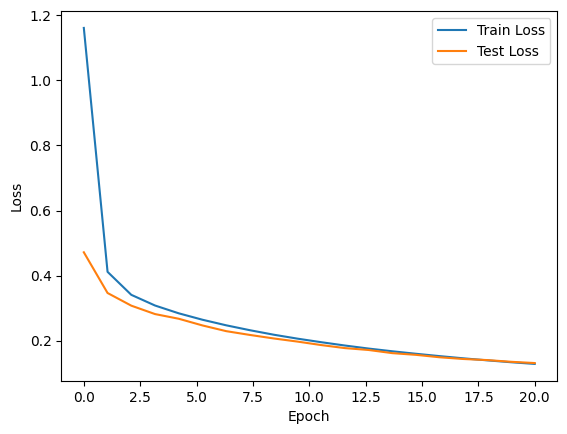

In [9]:
indim = 784
outdim = 10
hiddendim = 256
num_epochs = 20
lr = 0.01
net = Net1()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr)
time_start = time.time()
train_loss, test_loss = train(net, train_iter, loss, num_epochs, lr, optimizer)
time_end = time.time()
print("time spend: %.6f second" % (time_end - time_start))
draw_loss(train_loss,test_loss)

 epoch 1, train loss 2.1991, test loss 1.9016, train acc 0.275, test acc 0.536
 epoch 2, train loss 1.3716, test loss 0.9590, train acc 0.665, test acc 0.761
 epoch 3, train loss 0.7897, test loss 0.6405, train acc 0.808, test acc 0.840
 epoch 4, train loss 0.5872, test loss 0.5128, train acc 0.850, test acc 0.867
 epoch 5, train loss 0.4948, test loss 0.4470, train acc 0.870, test acc 0.882
 epoch 6, train loss 0.4425, test loss 0.4059, train acc 0.881, test acc 0.891
 epoch 7, train loss 0.4090, test loss 0.3801, train acc 0.887, test acc 0.895
 epoch 8, train loss 0.3859, test loss 0.3597, train acc 0.893, test acc 0.900
 epoch 9, train loss 0.3689, test loss 0.3457, train acc 0.898, test acc 0.902
 epoch 10, train loss 0.3557, test loss 0.3342, train acc 0.900, test acc 0.906
 epoch 11, train loss 0.3450, test loss 0.3260, train acc 0.902, test acc 0.907
 epoch 12, train loss 0.3361, test loss 0.3182, train acc 0.905, test acc 0.908
 epoch 13, train loss 0.3286, test loss 0.3128, t

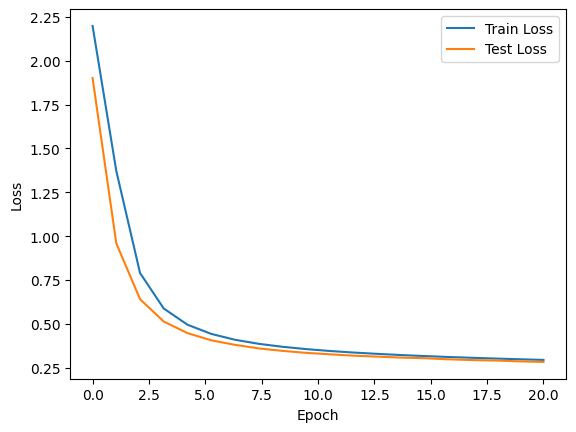

In [10]:
net = Net2()
optimizer = torch.optim.SGD(net.parameters(), lr)
time_start = time.time()
train_loss, test_loss = train(net, train_iter, loss, num_epochs, lr, optimizer)
time_end = time.time()
print("time spend: %.6f second" % (time_end - time_start))
draw_loss(train_loss,test_loss)

 epoch 1, train loss 1.0622, test loss 0.4608, train acc 0.774, test acc 0.880
 epoch 2, train loss 0.4103, test loss 0.3494, train acc 0.887, test acc 0.901
 epoch 3, train loss 0.3483, test loss 0.3155, train acc 0.901, test acc 0.910
 epoch 4, train loss 0.3235, test loss 0.3009, train acc 0.908, test acc 0.916
 epoch 5, train loss 0.3085, test loss 0.2915, train acc 0.912, test acc 0.917
 epoch 6, train loss 0.2975, test loss 0.2824, train acc 0.915, test acc 0.920
 epoch 7, train loss 0.2885, test loss 0.2769, train acc 0.918, test acc 0.921
 epoch 8, train loss 0.2805, test loss 0.2708, train acc 0.921, test acc 0.923
 epoch 9, train loss 0.2724, test loss 0.2636, train acc 0.923, test acc 0.925
 epoch 10, train loss 0.2644, test loss 0.2559, train acc 0.926, test acc 0.927
 epoch 11, train loss 0.2561, test loss 0.2482, train acc 0.928, test acc 0.929
 epoch 12, train loss 0.2478, test loss 0.2403, train acc 0.931, test acc 0.933
 epoch 13, train loss 0.2396, test loss 0.2341, t

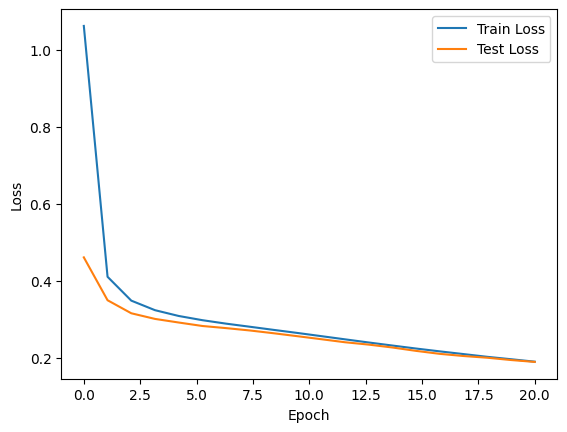

In [11]:
net = Net3()
optimizer = torch.optim.SGD(net.parameters(), lr)
time_start = time.time()
train_loss, test_loss = train(net, train_iter, loss, num_epochs, lr, optimizer)
time_end = time.time()
print("time spend: %.6f second" % (time_end - time_start))
draw_loss(train_loss,test_loss)